In [474]:
# Make necessary imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [475]:
df = pd.read_csv("https://raw.githubusercontent.com/prasheelsinha/machine_learning/refs/heads/main/Sales_Analysis/AusApparalSales4thQrt2020.csv")

In [476]:
df.shape

(7560, 6)

In [477]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


Data wrangling

a.Ensure that the data is clean and free from any missing or incorrect entries. Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().

b.Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

c.Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

d.Share your insights regarding the application of the GroupBy() function for either data chunking or merging, andoffer a recommendation based on your analysis.


### making the column names into lowercase to remove any confusions.

In [478]:
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'time', 'state', 'group', 'unit', 'sales'], dtype='object')

#Task 1-a

Ensure that the data is clean and free from any missing or incorrect entries.
Inspect the data manually to identify missing or incorrect information using the functions isna() and notna()

In [479]:
# a.Ensure that the data is clean and free from any missing or incorrect entries.
# Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().
df.isnull().sum().sort_values(ascending=False)

,0
date,0
time,0
state,0
group,0
unit,0
sales,0


In [480]:
df.isna().sum().sort_values(ascending=False)

,0
date,0
time,0
state,0
group,0
unit,0
sales,0


# Task 1-b
Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

## There are no missing or incorrect values in the dataset. Hence, no action is required for this.

In [481]:
# Below info shows that there are no null values as well.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7560 non-null   object
 1   time    7560 non-null   object
 2   state   7560 non-null   object
 3   group   7560 non-null   object
 4   unit    7560 non-null   int64 
 5   sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [482]:
# Check for any duplicated rows.

df.duplicated().sum()

np.int64(0)

### Converting the date column to pandas datetime in order to get week, month and quarter

In [483]:
# Convert date column to pandas date

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7560 non-null   datetime64[ns]
 1   time    7560 non-null   object        
 2   state   7560 non-null   object        
 3   group   7560 non-null   object        
 4   unit    7560 non-null   int64         
 5   sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [484]:
df.head()

,date,time,state,group,unit,sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


# Task 1-c
Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)

In [485]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['unit','sales']] = scaler.fit_transform(df[['unit','sales']])

In [486]:
df.head()

,date,time,state,group,unit,sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


# Task 1-d

Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.


## Most sales are happening for Men's group.

In [487]:
df_group = df.groupby(['group'])['sales'].sum().reset_index().sort_values('sales',ascending=False)

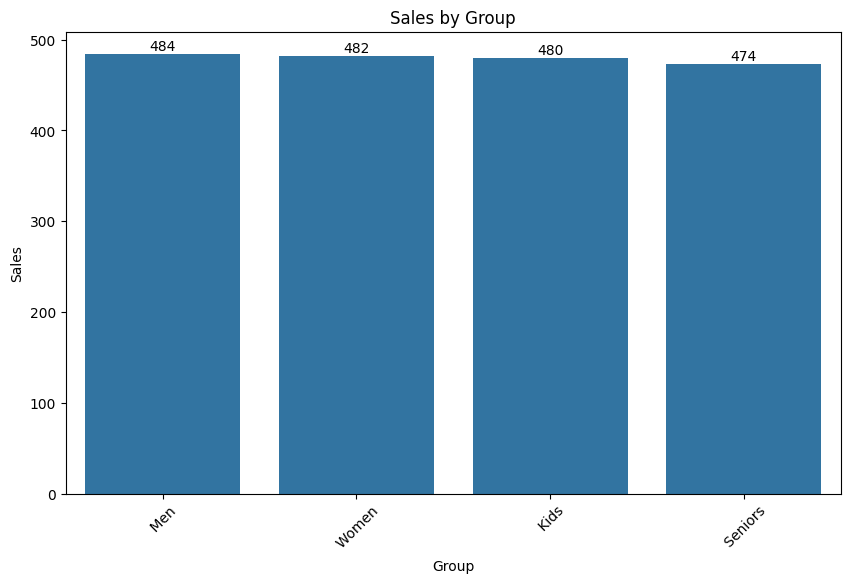

In [488]:
# Plotting bar plot on the basis of group
plt.figure(figsize=(10,6))
ax = sns.barplot(x='group', y='sales', data=df_group)
plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Sales by Group')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = '{:,.0f}'.format(y)
  ax.text(x, y * 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

## Most sales are done for VIC state.

In [489]:
df_state = df.groupby(['state'])['sales'].sum().reset_index().sort_values('sales',ascending=False)

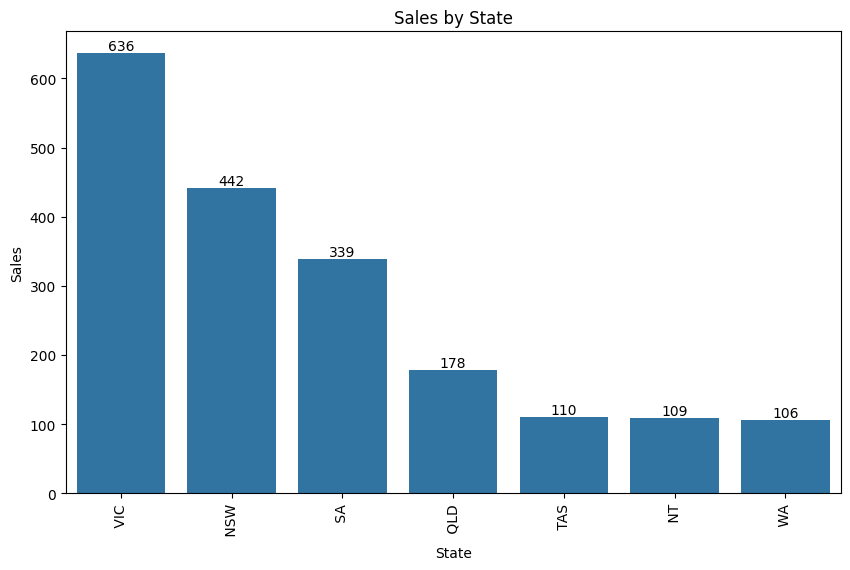

In [490]:
# Plotting bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='state', y='sales', data=df_state)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State')
for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:,.0f}'.format(y)
    ax.text(x, y * 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

## Most sales are happening during the Morning time

In [491]:
df_time = df.groupby(['time'])['sales'].sum().reset_index().sort_values('sales',ascending=False)

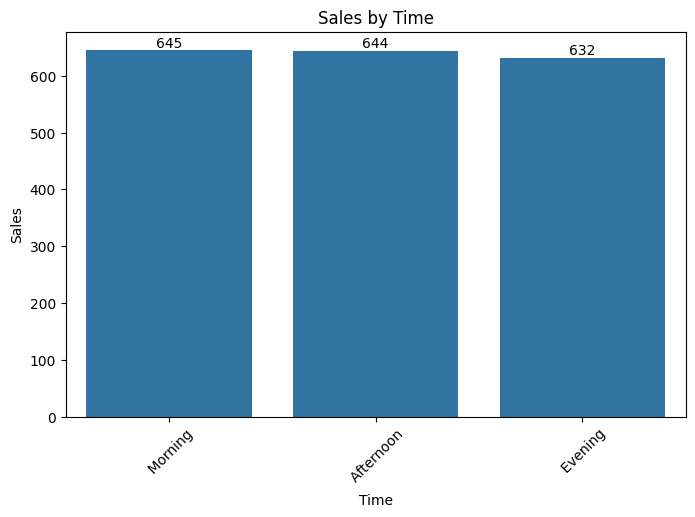

In [492]:
# Plotting bar plot for time vs sales
plt.figure(figsize = (8,5))
ax = sns.barplot(x='time', y ='sales', data=df_time)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Sales by Time')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = '{:,.0f}'.format(y)
  ax.text(x, y * 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

# From the above plots, we can consider the following insights:

1. Most of the sales happended in the Morning time.
2. Most sales are happening from VIC state.
3. Most sales are done for mens apparel

Data analysis

a.Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

b.Identify the group with the highest sales and the group with the lowest sales based on the data provided.

c.Identify thegroup with the highest and lowest sales based on the data provided.

d.Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)

# Task 2-a
Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis

## Below descriptive analysis shows that data is almost equally distributed as mean and median are close to each other. The difference is because VIC state contributes the most to unit and sales as compared to other states. This is causing the difference between the mean and median.

In [493]:
df.describe()

,date,unit,sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,0.254054,0.254054
min,2020-10-01 00:00:00,0.000000,0.000000
25%,2020-10-23 00:00:00,0.095238,0.095238
50%,2020-11-15 12:00:00,0.190476,0.190476
75%,2020-12-08 00:00:00,0.380952,0.380952
max,2020-12-30 00:00:00,1.000000,1.000000
std,NaN,0.204784,0.204784


In [494]:
df[['unit','sales']].mode()

,unit,sales
0,0.111111,0.111111


# Task 2-b / Task 2-c
Identify the group with the highest sales and the group with the lowest sales based on the data provided.

## As we can see from below group and sales the highest sales is done in Mens' category and lowest is done for Seniors.

In [495]:
df_group_sales = df.groupby('group')['sales'].sum().reset_index().sort_values('sales',ascending=False)
df_group_sales

,group,sales
1,Men,484.444444
3,Women,482.492063
0,Kids,480.142857
2,Seniors,473.571429


In [496]:
df_group_sales_max = df.groupby('group')['sales'].sum().idxmax()
df_group_sales_min = df.groupby('group')['sales'].sum().idxmin()

print(f"Highest Sales is done for {df_group_sales_max}")
print(f"Lowest Sales is done for {df_group_sales_min}")


Highest Sales is done for  Men
Lowest Sales is done for  Seniors


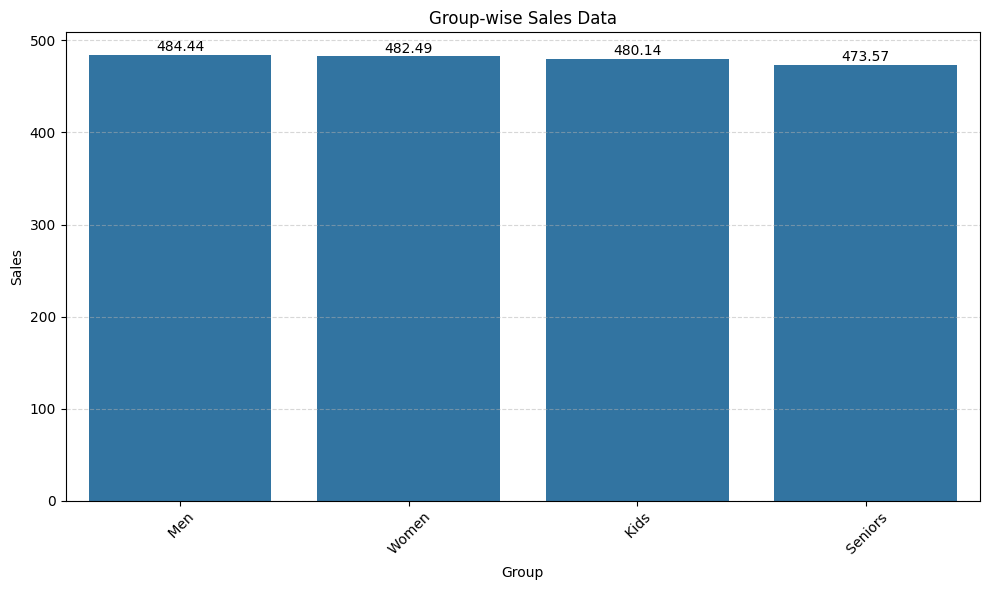

In [497]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_group_sales, x='group', y='sales')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Group-wise Sales Data')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = np.round(y, 2)
  plt.text(x, y + 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Task 2-d
## Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.


### Extracting week, month and quarter from the date column and adding it to the dataframe.

In [498]:
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df.head()

,date,time,state,group,unit,sales,week,month,quarter
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238,40,10,4
1,2020-10-01,Morning,WA,Men,0.095238,0.095238,40,10,4
2,2020-10-01,Morning,WA,Women,0.031746,0.031746,40,10,4
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349,40,10,4
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873,40,10,4


In [499]:
# Weekly
df_week_sales = df.groupby('week')['sales'].sum().reset_index().sort_values('sales',ascending=False)
df_week_sales

,week,sales
12,52,183.047619
11,51,182.317460
10,50,181.492063
9,49,169.412698
1,41,152.777778
3,43,151.587302
2,42,150.476190
4,44,122.460317
8,48,117.698413
6,46,115.761905


In [500]:
# Monthly Sales
df_monthly_sales = df.groupby('month')['sales'].sum().reset_index().sort_values('sales',ascending=False)
df_monthly_sales

,month,sales
2,12,779.238095
0,10,645.650794
1,11,495.761905


In [501]:
#Quarterly Sales
df_quarterly_sales = df.groupby('quarter')['sales'].sum().reset_index()
df_quarterly_sales

,quarter,sales
0,4,1920.650794


# Task 3-a-1

State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

## We can see below that VIC state has the highest sales.

In [502]:
df_group_state = df.groupby(['group','state'])['sales'].sum().reset_index().sort_values(['state','sales'],ascending=False)

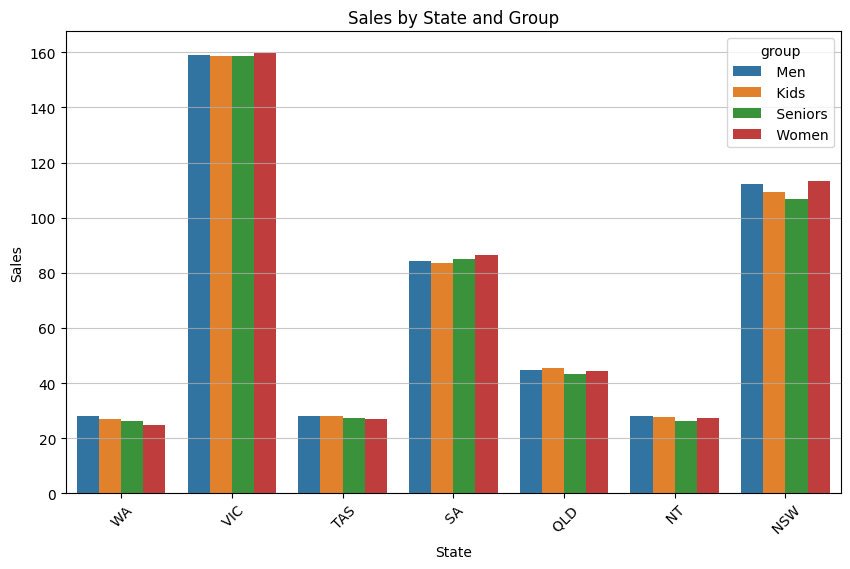

In [503]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='state', y='sales', hue='group', data=df_group_state)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State and Group')
plt.grid(True, axis='y', linestyle='-', alpha=0.7)  # Only horizontal lines (y-axis)
plt.xticks(rotation=45)
plt.show()

# Task 3-a-2

Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states

## Men has slightly higher sales across the various states.

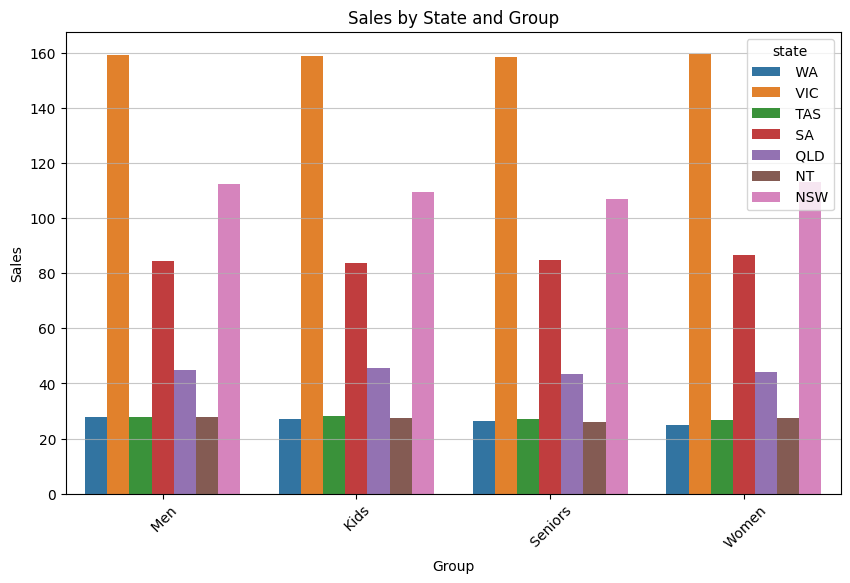

In [504]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='group', y='sales', hue='state', data=df_group_state)
plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Sales by State and Group')
plt.grid(True, axis='y', linestyle='-', alpha=0.7)  # Only horizontal lines (y-axis)
plt.xticks(rotation=45)
plt.show()

In [505]:
# Time wise sales

df_timewise_sales_max = df.groupby('time')['sales'].sum().idxmax()
df_timewise_sales_min = df.groupby('time')['sales'].sum().idxmin()

print(f"Maximum sales is done in {df_timewise_sales_max}")
print(f"Minimum sales is done in {df_timewise_sales_min}")

Maximum sales is done in  Morning
Minimum sales is done in  Evening


In [506]:
df_timewise_sales = df.groupby('time')['sales'].sum().reset_index().sort_values('sales',ascending=False)
df_timewise_sales

,time,sales
2,Morning,645.126984
0,Afternoon,643.857143
1,Evening,631.666667


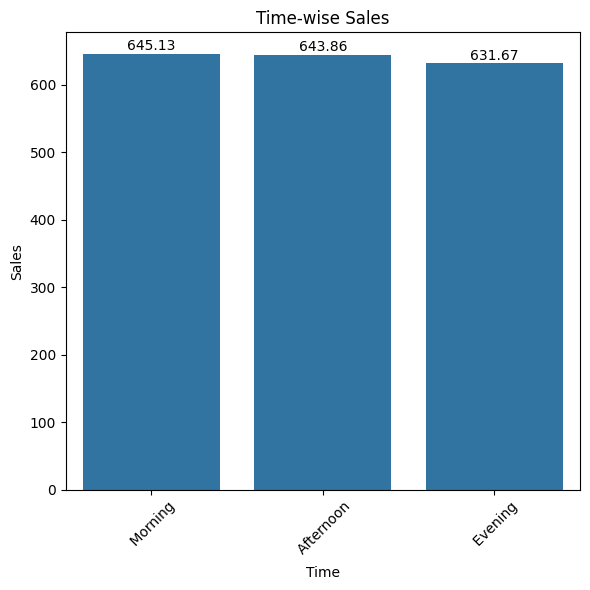

In [507]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df_timewise_sales, x='time', y='sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Time-wise Sales')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = np.round(y, 2)
  plt.text(x, y + 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 3-b
## Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).The dashboard must contain daily, weekly, monthly,and quarterly charts.(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

Text(0.5, 1.0, 'Daily Sales')

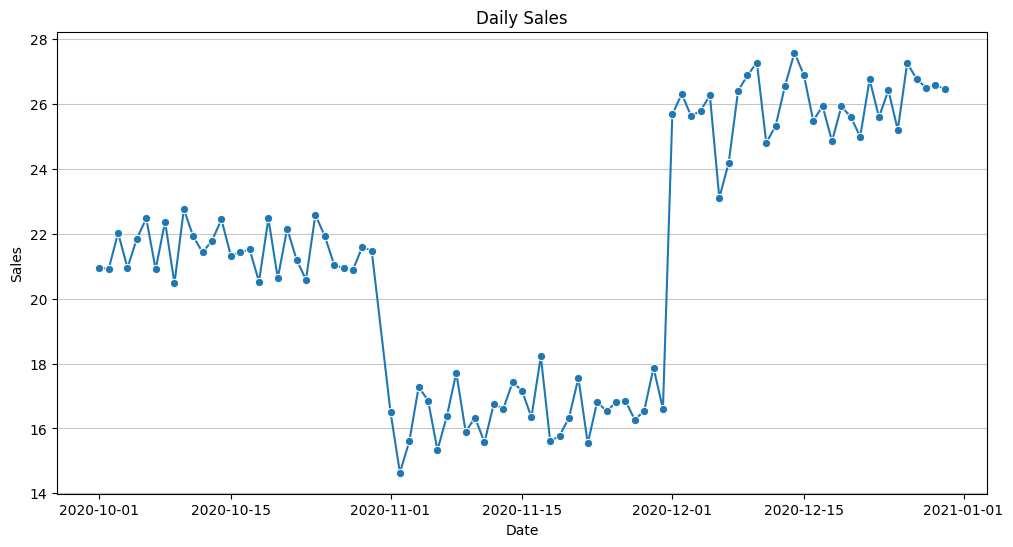

In [508]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='date', y='sales', marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.title('Daily Sales')

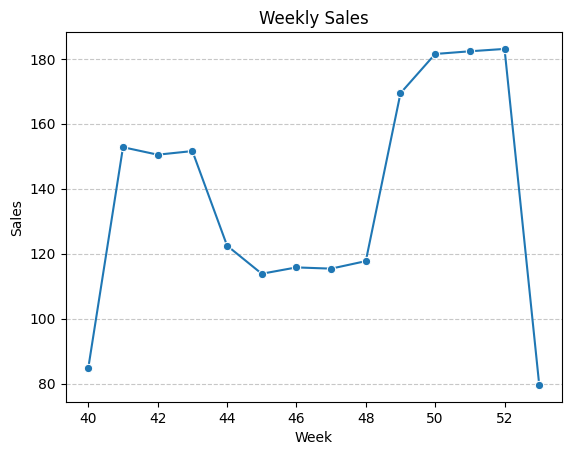

In [509]:
weekly_sales = df.groupby('week')['sales'].sum().reset_index()
sns.lineplot(data=weekly_sales, x='week', y='sales', marker='o')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

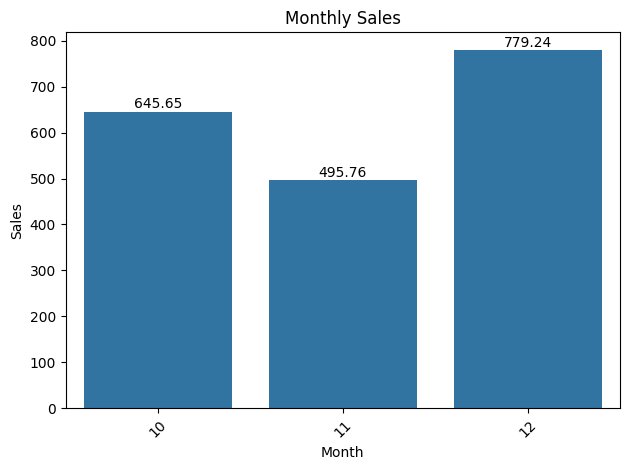

In [510]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
ax = sns.barplot(data=monthly_sales, x='month', y='sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = np.round(y,2)
  plt.text(x, y + 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

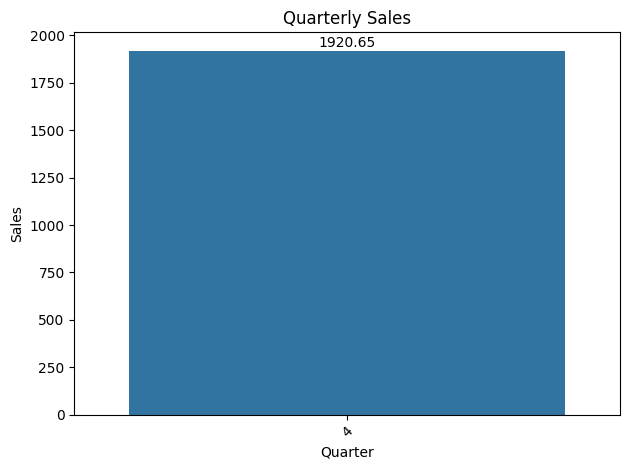

In [511]:
quarterly_sales = df.groupby('quarter')['sales'].sum().reset_index()
ax = sns.barplot(data=quarterly_sales, x='quarter', y='sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales')
for bar in ax.patches:
  x = bar.get_x() + bar.get_width() / 2
  y = bar.get_height()
  label = np.round(y, 2)
  plt.text(x, y + 1.0, label, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 3-c
## Include your recommendation and indicate why you are choosing the recommended visualization package.

1. We will use barplot to mark state-wise data across all the groups. This will give us clear data points to pin-point the groups with highest sales in each state.

2. We will use barplot to mark group-wise data acorss all the states. This will give us clear data points to pin-point the state with highest sales in each group.

3. We will use barplot to identify the time of the day with lowest sales so that personalized offers and deals could be offered to the customers to boost the sales at the time of the day where sales are the lowest.

# Task 4-a

## Use JupyterLabNotebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots

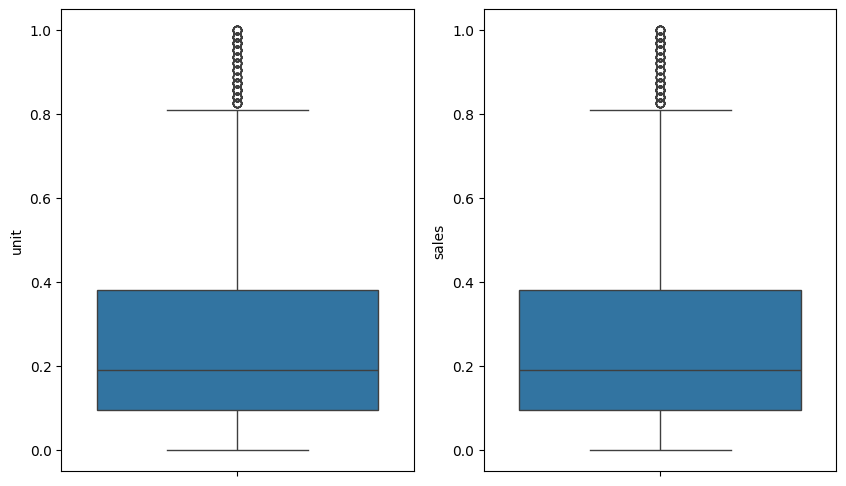

In [512]:
# Plotting boxplots to check for outliers in unit and sales column
# Plotting for unit and sales column
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.boxplot(df['unit'], ax=ax[0])
sns.boxplot(df['sales'], ax=ax[1])
plt.show()

In [513]:
print("1.  Dataset was loaded and first checked for any NA values using isna() function.")
print("2.  Further info() function was called to ensure there are no null values.")
print("3.  MinMaxScaler was used to scale the data in order to maintain fairness of the features. \n    Also it will help in improving the model performance")
print("4.  Based on group column, sales data was analysed to find out that most sales was done for Mens\' apparel")
print("5.  Descriptive statistical analysis was performed to ensure there is no skewness and data is equally distributed.\n    The data was found to be equally distributed with slight difference in mean and median as VIC state was heavily contributing to the sales")
print('6.  Upon grouping the sales data according to group, we found that most sales are done for Men and least is done for Seniors')
print('7.  Weekly, monthly and quarterly reports were generated and we found that 52nd week and 12th month generated the most sales.\n    As we have data for only single quarter, so we could not compare across various quarters.')
print('8.  For each state, we grouped the data of sales based on group and found that Men has the most sales across all the states.')
print('9.  For each group, we grouped the data of sales based on state and found that VIC state made the most sales across all the states.')
print('10. For time of the day, we grouped the data of sales and found that maximum sales is done in the morning and minimum sales is done in the evening.\n    This indicates that the company has to come up with personalized deals and offers during the evening time to boost the sales.')
print('11. The visualization package selection has been mentioned near the plots itself.')
print('12. We used descriptive statistical analysis for sales and unit column and concluded that outliers are the reason for mean and median variance.\n    But the outlier cases seems legitimate as most of the sales and generated from VIC state. So, outlier treatment approach has not been used in this case.')

1.  Dataset was loaded and first checked for any NA values using isna() function.
2.  Further info() function was called to ensure there are no null values.
3.  MinMaxScaler was used to scale the data in order to maintain fairness of the features. 
    Also it will help in improving the model performance
4.  Based on group column, sales data was analysed to find out that most sales was done for Mens' apparel
5.  Descriptive statistical analysis was performed to ensure there is no skewness and data is equally distributed.
    The data was found to be equally distributed with slight difference in mean and median as VIC state was heavily contributing to the sales
6.  Upon grouping the sales data according to group, we found that most sales are done for Men and least is done for Seniors
7.  Weekly, monthly and quarterly reports were generated and we found that 52nd week and 12th month generated the most sales.
    As we have data for only single quarter, so we could not compare across vari